### Monte Carlo Forecasting Stock Prices - Part-1

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import norm

from pandas_datareader import data as pdr

import yfinance as yfin

yfin.pdr_override()

import matplotlib.pyplot as plt

### Price Today = Price Yesterday * e ^(Drift + Random Value)

#### Drift = ( u - 1/2(variance)) & Random Value = strt(varience)Z(Rand(0,1))

In [3]:
ticker= 'PG'
data  = pd.DataFrame()

data[ticker] =pdr.get_data_yahoo(ticker,start="2007-1-1")["Adj Close"]

data

[*********************100%***********************]  1 of 1 completed


,PG
Date,
2007-01-03,39.827572
2007-01-04,39.525181
2007-01-05,39.185795
2007-01-08,39.272179
2007-01-09,39.173439
...,...
2023-07-28,156.410004
2023-07-31,156.300003
2023-08-01,156.250000


In [4]:
log_returns = np.log(1 + data.pct_change())

log_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002517
...,...
2023-07-28,0.027877
2023-07-31,-0.000704
2023-08-01,-0.000320


Text(0, 0.5, 'Rate')

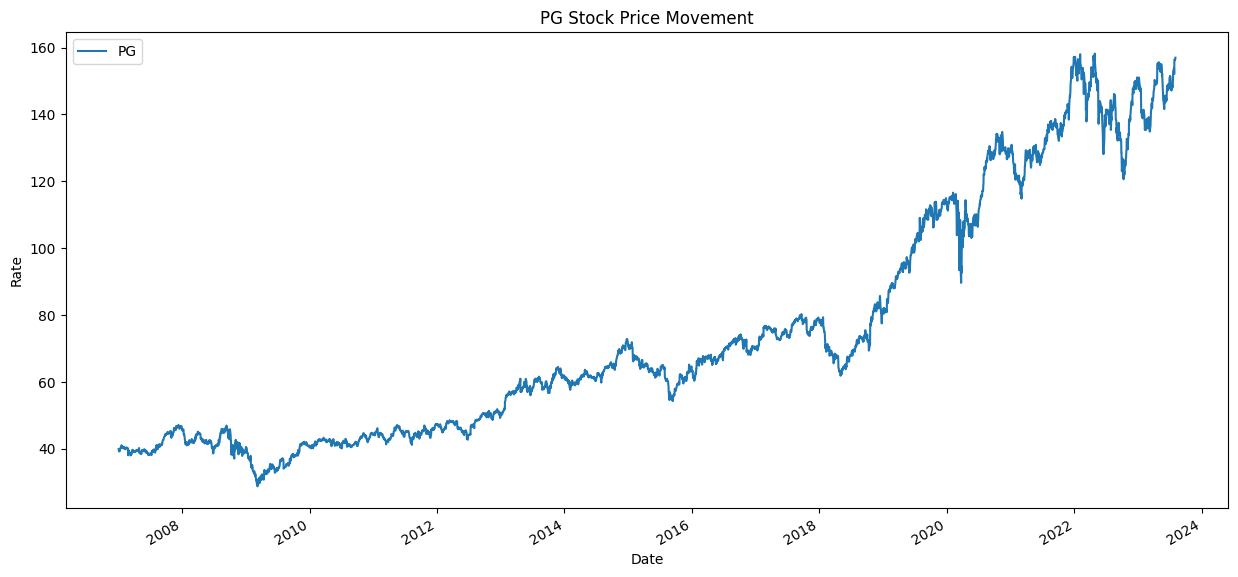

In [7]:
data.plot(figsize=(15,7))
plt.title("PG Stock Price Movement")
plt.xlabel("Date")
plt.ylabel("Rate")

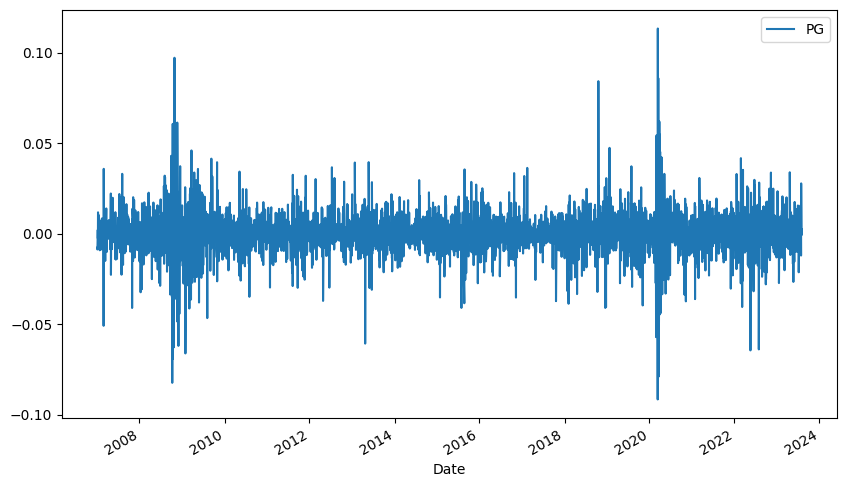

In [9]:
log_returns.plot(figsize=(10,6))
plt.show()

In [10]:
u = log_returns.mean()
u

PG    0.000329
dtype: float64

In [12]:
var = log_returns.var()
var


PG    0.000139
dtype: float64

drift = u - 1/2(var)

In [13]:
drift = u - (0.5*var)
drift

PG    0.000259
dtype: float64

In [14]:
stdev = log_returns.std()
stdev

PG    0.011785
dtype: float64

## Browian Motion  r = drift + std * e^r

In [15]:
type(drift)

pandas.core.series.Series

In [16]:
np.array(drift)

array([0.00025918])

In [17]:
drift.values

array([0.00025918])

In [18]:
stdev.values

array([0.01178527])

In [20]:
## Random Number

norm.ppf(0.95)

1.6448536269514722

In [22]:
x = np.random.rand(10,2)
x

array([[0.10978951, 0.39228956],
       [0.51075688, 0.67766471],
       [0.9322564 , 0.38222745],
       [0.93138157, 0.39481767],
       [0.64484188, 0.89454155],
       [0.93230372, 0.12417544],
       [0.33094168, 0.65337105],
       [0.33741831, 0.96703472],
       [0.1710401 , 0.59409835],
       [0.55952741, 0.22063562]])

In [23]:
norm.ppf(x)

array([[-1.22764831, -0.27335658],
       [ 0.02696676,  0.46117845],
       [ 1.49280895, -0.2996359 ],
       [ 1.48615977, -0.26678416],
       [ 0.37143141,  1.25104817],
       [ 1.49317052, -1.15436423],
       [-0.4373144 ,  0.39443771],
       [-0.41951934,  1.83889543],
       [-0.95006309,  0.23810029],
       [ 0.14977113, -0.77004832]])

In [24]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.33277372,  0.19238512],
       [ 0.88293238,  1.8617358 ],
       [ 0.08626855, -0.30167512],
       [-0.91434397, -0.00491105],
       [ 0.79246448, -0.67511371],
       [-1.09020987,  1.18250219],
       [ 0.58845862,  0.56335173],
       [-1.06342108, -1.45960044],
       [ 0.73527018, -0.58255999],
       [-0.46940382,  0.65307341]])

In [27]:
t_intervals = 4175
iterations = 10

## Daily returns = e^r

r = drift + stdev*z

In [28]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.00899413, 0.98226966, 0.99008627, ..., 1.02530416, 0.99054368,
        0.98258588],
       [0.99851401, 1.01994483, 1.00747452, ..., 1.00531502, 1.00254301,
        0.99638902],
       [1.00024572, 0.98810375, 1.00730683, ..., 1.02524779, 1.00833003,
        1.01752168],
       ...,
       [1.01405292, 1.02413926, 0.99659883, ..., 1.01759675, 1.01170961,
        0.98775549],
       [1.02047836, 0.99914382, 1.00823053, ..., 1.0050336 , 1.00415635,
        1.00718582],
       [0.98293612, 0.99493138, 0.99614346, ..., 0.99965987, 1.00652218,
        1.0156411 ]])

In [29]:
S0 = data.iloc[-1]
S0

PG    157.0
Name: 2023-08-03 00:00:00, dtype: float64

In [30]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
price_list[0] = S0

price_list

array([[157., 157., 157., ..., 157., 157., 157.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [32]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [33]:
price_list

array([[157.        , 157.        , 157.        , ..., 157.        ,
        157.        , 157.        ],
       [156.76669931, 160.13133906, 158.17349945, ..., 157.83445882,
        157.39925205, 156.43307579],
       [156.80521933, 158.22637694, 159.32924644, ..., 161.81942956,
        158.71039324, 159.17404548],
       ...,
       [460.85379884, 413.86246775, 530.62842554, ..., 316.09589665,
        412.50239872, 180.10621839],
       [470.29132965, 413.50812721, 534.99577628, ..., 317.68699692,
        414.21690416, 181.40042936],
       [462.26633264, 411.41220976, 532.93254585, ..., 317.5789423 ,
        416.91850306, 184.23773116]])

St = St-1 * daily_returnt

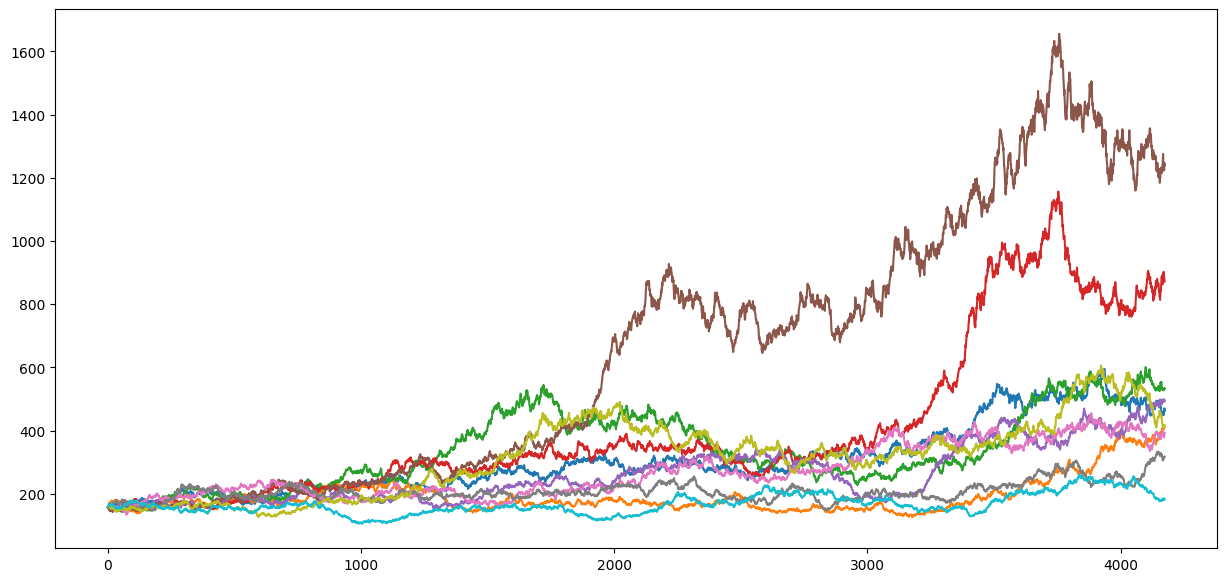

In [35]:
plt.figure(figsize=(15,7))
plt.plot(price_list)
plt.show()

## Let us save this predictions back to local machine in dataframe

In [36]:
pd.DataFrame(price_list)

,0,1,2,3,4,5,6,7,8,9
0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
1,156.766699,160.131339,158.173499,157.530052,156.750415,154.007930,159.377293,157.834459,157.399252,156.433076
2,156.805219,158.226377,159.329246,155.207734,155.256262,152.824786,158.276514,161.819430,158.710393,159.174045
3,158.239417,160.603175,158.478028,154.474531,153.205295,154.351794,159.106451,163.746576,159.784565,160.677546
4,159.032073,163.483181,159.951592,157.607575,151.984977,151.274297,162.408346,166.532886,159.516086,160.387751
...,...,...,...,...,...,...,...,...,...,...
4170,448.392102,403.862568,527.286404,902.531446,498.995259,1246.560784,386.800454,312.250211,415.772870,181.989723
4171,454.467207,404.107607,532.439344,892.013228,497.848493,1233.069079,381.859112,310.629822,407.728061,182.338868
4172,460.853799,413.862468,530.628426,887.969433,494.407119,1223.048786,377.688273,316.095897,412.502399,180.106218
4173,470.291330,413.508127,534.995776,876.552928,497.325282,1246.959418,387.003321,317.686997,414.216904,181.400429
